In [2]:
import pandas as pd
credits = pd.read_csv('credits.csv')
titles = pd.read_csv('titles.csv')

In [3]:
titles.shape

(1854, 15)

In [4]:
credits.shape

(30689, 5)

In [5]:
director = credits[credits['role'] == 'DIRECTOR']

In [6]:
director.shape

(1567, 5)

In [7]:
director_grouped = director.groupby('id').agg({'name': 'unique'}).reset_index()

In [8]:
director_grouped.shape

(1291, 2)

In [9]:
director_grouped[director_grouped['id'] == 'tm61729']

,id,name
934,tm61729,"[James Algar, Clyde Geronimi, Jack Kinney]"


In [10]:
merged = pd.merge(titles, director_grouped, on = 'id', how='outer')
merged = merged.rename(columns={'name': 'director'})

In [11]:
merged.shape

(1854, 16)

In [12]:
merged.isna().sum()

id                         0
title                      0
type                       0
description                9
release_year               0
age_certification        451
runtime                    0
genres                     0
production_countries       0
seasons                 1314
imdb_id                  478
imdb_score               515
imdb_votes               526
tmdb_popularity           15
tmdb_score               146
director                 563
dtype: int64

In [13]:
merged.loc[merged['seasons'].isnull(), 'seasons'] = 0
merged.loc[merged['age_certification'].isnull(), 'age_certification'] = 'UNRATED'

In [14]:
def rate(x):
    if x == 'UNRATED':
        return 0
    elif x == 'G':
        return 1
    elif x == 'PG':
        return 2
    elif x == 'PG-13':
        return 3
    elif x == 'R':
        return 4
    elif x == 'TV-G':
        return 5
    elif x == 'TV-Y7':
        return 6
    elif x == 'TV-Y':
        return 7
    elif x == 'TV-PG':
        return 8
    return 9


merged['age_rating'] = merged['age_certification'].apply(rate)

In [15]:
merged.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,director,age_rating
0,tm89464,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",1947,G,96,"['family', 'comedy', 'drama']",['US'],0.0,tt0039628,7.9,50969.0,23.515,7.388,[George Seaton],1
1,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,G,68,"['horror', 'fantasy', 'animation', 'family', '...",['US'],0.0,tt0041094,6.9,16502.0,16.194,6.500,"[James Algar, Clyde Geronimi, Jack Kinney]",1
2,tm61052,Cinderella,MOVIE,Cinderella has faith her dreams of a better li...,1950,G,74,"['fantasy', 'animation', 'family', 'romance']",['US'],0.0,tt0042332,7.3,164292.0,93.547,7.035,"[Wilfred Jackson, Hamilton Luske, Clyde Geronimi]",1
3,tm87946,Dumbo,MOVIE,Dumbo is a baby elephant born with over-sized ...,1941,G,64,"['animation', 'drama', 'family', 'fantasy']",['US'],0.0,tt0033563,7.2,135045.0,54.265,6.999,"[Ben Sharpsteen, Jack Kinney, William Roberts,...",1
4,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,1941,G,119,"['animation', 'family', 'fantasy', 'music']",['US'],0.0,tt0032455,7.7,98764.0,43.609,7.382,"[Paul Satterfield, Hamilton Luske, Jim Handley...",1


In [16]:
disney = merged.dropna(subset=['tmdb_score'])

In [17]:
disney.shape

(1708, 17)

In [18]:
df1 = disney.copy(deep=True)

In [19]:
df1['production_countries'] = df1['production_countries'].apply(lambda x: eval(x))

In [20]:
#average score if us is the production countries
df1[df1['production_countries'].apply(lambda x: 'US' in x)]['tmdb_score'].mean()

6.8010359666024405

In [21]:
#average score if us is not the production countries
df1[df1['production_countries'].apply(lambda x: 'US' not in x)]['tmdb_score'].mean()

6.987192052980133

In [22]:
#us is the only production country
df1[df1['production_countries'].apply(lambda x: x == ['US'])]['tmdb_score'].mean()

6.814694699646643

In [23]:
df1 = df1.explode('production_countries')
df1.shape

(1895, 17)

In [24]:
df1.groupby('production_countries')['tmdb_score'].mean()

production_countries
AE    8.000000
AR    7.901800
AT    7.050000
AU    6.527211
BE    6.552000
BR    6.722167
BW    7.000000
CA    6.462375
CH    7.400000
CI    7.000000
CL    7.500000
CN    6.886750
CO    8.053333
CZ    6.600000
DE    6.576091
DK    6.677750
ES    7.240000
FR    6.905852
GB    6.934372
GT    9.000000
HK    7.400000
IE    5.900000
IN    7.051143
IT    7.681400
JP    6.877300
KI    7.200000
KR    7.892714
MC    7.400000
MX    7.708333
NL    6.500000
NO    6.500000
NZ    6.573800
PH    8.300000
PL    6.600000
PR    7.000000
SE    6.500000
SI    6.600000
SK    6.381000
TR    5.700000
TW    4.500000
UG    7.000000
US    6.801036
ZA    8.100000
Name: tmdb_score, dtype: float64

In [25]:
counts = df1['production_countries'].value_counts()

In [26]:
counts

US    1557
GB      86
CA      64
FR      27
AU      19
DE      11
AR      10
JP      10
CN       8
KR       7
IN       7
BR       6
NZ       5
IT       5
ES       5
DK       4
CO       3
MX       3
BE       2
AT       2
PH       2
BW       1
GT       1
TW       1
KI       1
TR       1
ZA       1
CL       1
UG       1
AE       1
NL       1
CI       1
SE       1
HK       1
NO       1
IE       1
CZ       1
SI       1
PL       1
SK       1
MC       1
CH       1
PR       1
Name: production_countries, dtype: int64

In [27]:
counts[counts >= 5].index

Index(['US', 'GB', 'CA', 'FR', 'AU', 'DE', 'AR', 'JP', 'CN', 'KR', 'IN', 'BR',
       'NZ', 'IT', 'ES'],
      dtype='object')

In [28]:
filtered = df1[df1['production_countries'].isin(counts[counts > 5].index)]

In [29]:
country_scores = filtered.groupby('production_countries')['tmdb_score'].mean()
sorted_scores = country_scores.sort_values(ascending=False)

#the top 5 countries from the sorted Series
top5= sorted_scores.head(5)
top5

production_countries
AR    7.901800
KR    7.892714
IN    7.051143
GB    6.934372
FR    6.905852
Name: tmdb_score, dtype: float64

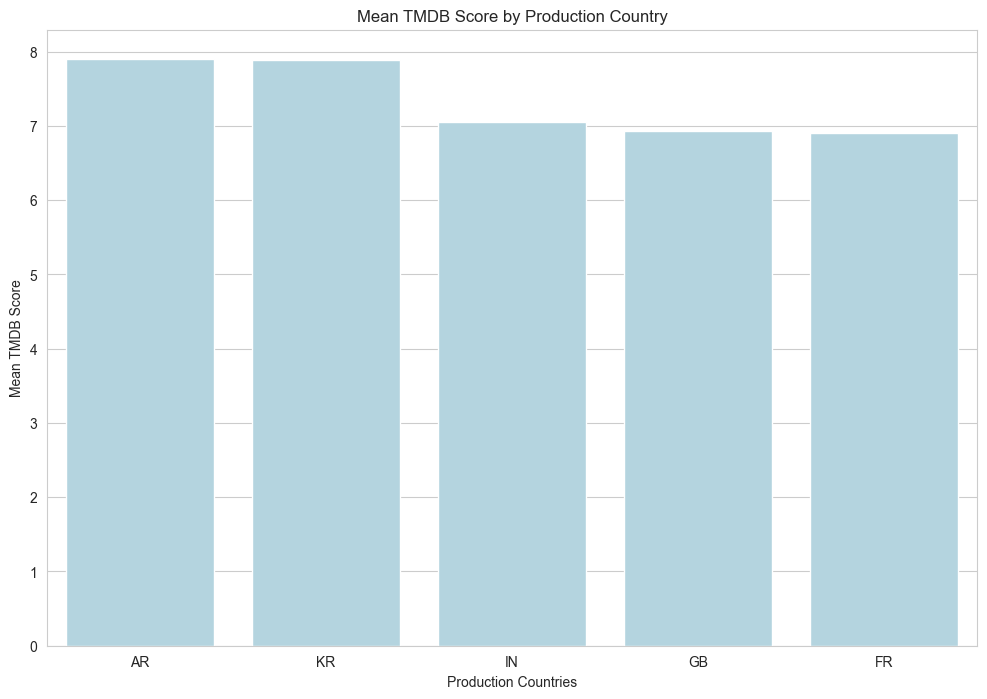

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.figure(figsize=(12,8))
sns.barplot(y=sorted_scores[:5].values, x=sorted_scores[:5].index, color='lightblue')
plt.title('Mean TMDB Score by Production Country')
plt.xlabel('Production Countries')
plt.ylabel('Mean TMDB Score')

plt.show()

In [31]:
#popularity
country_scores = filtered.groupby('production_countries')['tmdb_popularity'].mean()
sorted_scores = country_scores.sort_values(ascending=False)

#the top 5 countries from the sorted Series
top5= sorted_scores.head(5)
top5

production_countries
BR    82.004000
AR    66.304700
FR    34.733074
IN    30.508714
CN    30.119875
Name: tmdb_popularity, dtype: float64

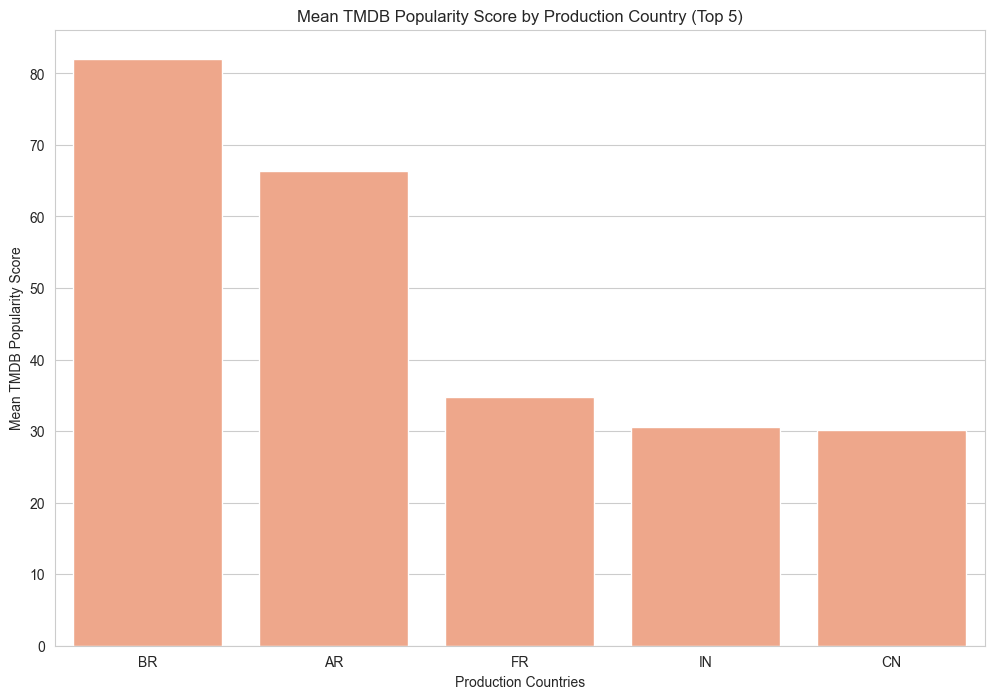

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.figure(figsize=(12,8))
sns.barplot(x=sorted_scores[:5].index, y=sorted_scores[:5].values, color='lightsalmon')
plt.title('Mean TMDB Popularity Score by Production Country (Top 5)')
plt.xlabel('Production Countries')
plt.ylabel('Mean TMDB Popularity Score')

plt.show()

In [33]:
df1[df1['production_countries'] == 'FR'].shape

(27, 17)

In [34]:
filtered['production_countries'].unique()

array(['US', 'GB', 'CA', 'FR', 'AU', 'DE', 'JP', 'IN', 'CN', 'BR', 'AR',
       'KR'], dtype=object)

In [35]:
disney.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score', 'director', 'age_rating'],
      dtype='object')

In [36]:
from sklearn.linear_model import LinearRegression
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

x = disney[['release_year', 'runtime', 'tmdb_popularity', 'seasons', 'age_rating']]
y = disney["tmdb_score"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression().fit(x_train, y_train)
y_pred = model.predict(x_test)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Root Mean Squared Error: 1.1500334097240918
R-squared: 0.048114140354475254


In [37]:
#check the prediction of the movies produced by france
country = disney[disney['production_countries'].str.contains('FR')]
feature = country[['release_year', 'runtime', 'tmdb_popularity', 'seasons', 'age_rating']]
pred = model.predict(feature)

pd.DataFrame(list(zip(country['tmdb_score'], pred)), columns=['real score', 'predict score'])

,real score,predict score
0,6.700,6.654016
1,6.951,6.650189
2,6.600,7.403610
3,5.300,6.691383
4,7.400,6.594606
5,6.300,6.769163
6,7.000,6.626628
7,7.000,7.259532
8,8.019,7.931054
9,6.600,6.624721


In [198]:
from sklearn.tree import DecisionTreeRegressor
x = disney[['release_year', 'runtime', 'tmdb_popularity', 'seasons', 'age_rating']]
y = disney["tmdb_score"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor().fit(x_train, y_train)
y_pred = model.predict(x_test)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Root Mean Squared Error: 1.5273030170362243
R-squared: -0.678859606909443


In [92]:
from sklearn.ensemble import RandomForestRegressor
x = disney[['release_year', 'runtime', 'tmdb_popularity', 'seasons', 'age_rating']]
y = disney["tmdb_score"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = RandomForestRegressor().fit(x_train, y_train)
y_pred = model.predict(x_test)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Root Mean Squared Error: 1.1539545685231707
R-squared: 0.04161196615830853


In [99]:
#select different feature and make another model
select = df1[['release_year', 'runtime','production_countries', 
            'tmdb_popularity', 'seasons', 'age_rating','tmdb_score']]
select_dummy = pd.get_dummies(select, columns=['production_countries'])

In [100]:
select_dummy

,release_year,runtime,tmdb_popularity,seasons,age_rating,tmdb_score,production_countries_AE,production_countries_AR,production_countries_AT,production_countries_AU,...,production_countries_PL,production_countries_PR,production_countries_SE,production_countries_SI,production_countries_SK,production_countries_TR,production_countries_TW,production_countries_UG,production_countries_US,production_countries_ZA
0,1947,96,23.515,0.0,1,7.388,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1950,68,16.194,0.0,1,6.500,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1950,74,93.547,0.0,1,7.035,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1941,64,54.265,0.0,1,6.999,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1941,119,43.609,0.0,1,7.382,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1844,2023,43,40.633,1.0,0,7.000,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1845,2023,42,10.543,0.0,3,10.000,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1848,2023,23,3.755,2.0,7,6.000,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1849,2023,49,3.733,1.0,8,2.000,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [103]:
x = select_dummy.drop(['tmdb_score'], axis = 1)
y = select_dummy["tmdb_score"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#fit a linear regression model to the training data
model = LinearRegression().fit(x_train, y_train)

y_pred = model.predict(x_test)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

#Get the coefficients of the model
coefficients = pd.DataFrame(model.coef_, x.columns, columns=["Coefficient"])
coefficients.sort_values("Coefficient", ascending=False)['Coefficient'][:5]


Root Mean Squared Error: 1.1186822829306167
R-squared: 0.027296987582568488


production_countries_GT    1.720928
production_countries_ZA    1.490921
production_countries_AE    1.337935
production_countries_PH    1.180384
production_countries_CO    1.179258
Name: Coefficient, dtype: float64

In [202]:
from sklearn.ensemble import RandomForestRegressor
x = select_dummy.drop(['tmdb_score'], axis = 1)
y = select_dummy["tmdb_score"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = RandomForestRegressor().fit(x_train, y_train)
y_pred = model.predict(x_test)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Root Mean Squared Error: 0.9274001003595836
R-squared: 0.33150060594558695


In [176]:
countries = [x for x in x_test.columns if x.startswith('production')]
xtest_countries = x_test.loc[:, countries]

In [190]:
countries_list = []
for i in range(len(xtest_countries)):
    if 1 in xtest_countries.iloc[i].values:
        name = xtest_countries.iloc[i][xtest_countries.iloc[i] == 1].idxmax()
    else:
        name = None
    countries_list.append(name)

In [191]:
countries_list = [x.replace('production_countries_','') if x is not None else x for x in countries_list ]

In [192]:
#create a df of production countries and the actual tmdb score and predicted score
test_scores = pd.DataFrame({'production_countries': countries_list,
                                  'actual_score': y_test,
                                  'predicted_score': y_pred})

In [193]:
test_scores

,production_countries,actual_score,predicted_score
1253,US,8.478,6.9850
546,US,5.900,6.2258
869,US,6.800,8.0334
1233,IT,8.000,6.9400
525,US,5.900,6.2720
...,...,...,...
552,US,7.638,7.6648
138,US,5.967,5.9956
900,US,7.200,7.3016
602,US,6.800,6.4600


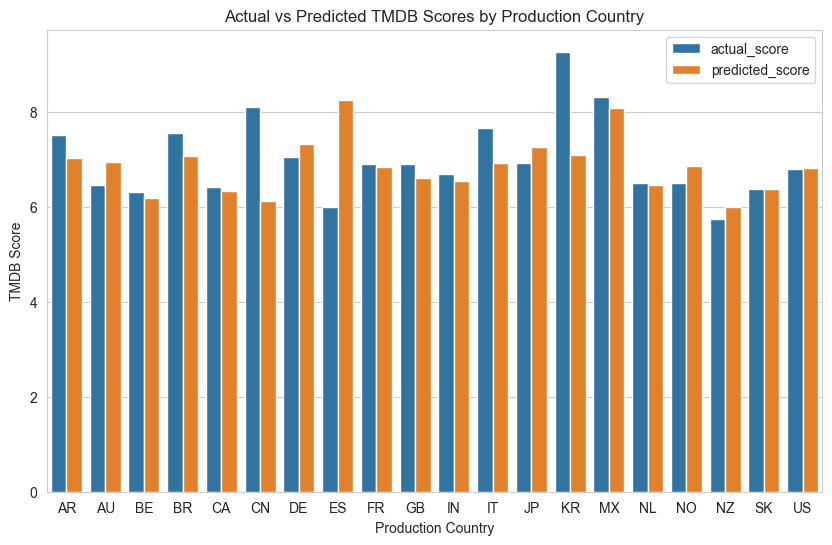

In [208]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
grouped_scores = test_scores.groupby('production_countries').mean().reset_index()
melted_scores = pd.melt(grouped_scores, id_vars=['production_countries'], var_name='score_type', value_name='score')
sns.barplot(x='production_countries', y='score', hue='score_type', data=melted_scores)
plt.xlabel('Production Country')
plt.ylabel('TMDB Score')
plt.title('Actual vs Predicted TMDB Scores by Production Country')
plt.legend()
plt.show()


In [233]:
#random pick 20 movies from dataset that is not produced by us
select20 = select_dummy.loc[(select_dummy['production_countries_US'] == 0)].sample(n=20, random_state=40)
select20_x = select20.drop('tmdb_score', axis= 1)
actual20 = select20['tmdb_score']
predict_20 = model.predict(select20_x)

In [234]:
#add us as production country to those 20 movies to see the prediction
select20_x['production_countries_US'] = 1
predict_20_new = model.predict(select20_x)

In [235]:
#create a df to see the original score, original predicted score and predicted score after add us as production country
df20 = pd.DataFrame({'original score':actual20,
              'original predict': predict_20,
              'new predict': predict_20_new}).reset_index()
df20

,index,original score,original predict,new predict
0,233,5.799,5.97818,6.00115
1,1028,7.900,7.75834,7.72983
2,1623,6.500,7.20229,7.19474
3,947,3.000,4.56533,4.73333
4,993,4.650,5.89431,5.88265
5,791,5.847,5.88100,5.90263
6,686,5.179,5.26535,5.26182
7,1223,8.000,7.68465,7.59832
8,1086,6.000,6.13706,6.18818
9,1018,6.551,6.66375,6.77030


In [107]:
#use knn regressor
from sklearn.neighbors import KNeighborsRegressor
x = select_dummy.drop(['tmdb_score'], axis = 1)
y = select_dummy["tmdb_score"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = KNeighborsRegressor().fit(x_train, y_train)
y_pred = model.predict(x_test)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Root Mean Squared Error: 1.006971321394417
R-squared: 0.21186440029828124


In [46]:
df2 = filtered.copy(deep=True)

In [47]:
df2['genres'] = df2['genres'].apply(lambda x: eval(x))

In [48]:
df2 = df2.explode(column='genres')

In [49]:
df2

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,director,age_rating
0,tm89464,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",1947,G,96,family,US,0.0,tt0039628,7.9,50969.0,23.515,7.388,[George Seaton],1
0,tm89464,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",1947,G,96,comedy,US,0.0,tt0039628,7.9,50969.0,23.515,7.388,[George Seaton],1
0,tm89464,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",1947,G,96,drama,US,0.0,tt0039628,7.9,50969.0,23.515,7.388,[George Seaton],1
1,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,G,68,horror,US,0.0,tt0041094,6.9,16502.0,16.194,6.500,"[James Algar, Clyde Geronimi, Jack Kinney]",1
1,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,G,68,fantasy,US,0.0,tt0041094,6.9,16502.0,16.194,6.500,"[James Algar, Clyde Geronimi, Jack Kinney]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1848,ts350456,Superkitties,SHOW,It tells the story of four fierce and furry su...,2023,TV-Y,23,fantasy,US,2.0,tt19872934,7.3,85.0,3.755,6.000,NaN,7
1849,ts305794,7 Toughest Days,SHOW,Dwayne Fields grew up around violent gangs and...,2023,TV-PG,49,reality,US,1.0,tt15257974,7.8,23.0,3.733,2.000,NaN,8
1849,ts305794,7 Toughest Days,SHOW,Dwayne Fields grew up around violent gangs and...,2023,TV-PG,49,documentation,US,1.0,tt15257974,7.8,23.0,3.733,2.000,NaN,8
1849,ts305794,7 Toughest Days,SHOW,Dwayne Fields grew up around violent gangs and...,2023,TV-PG,49,action,US,1.0,tt15257974,7.8,23.0,3.733,2.000,NaN,8


In [50]:
genre_count = df2.groupby('production_countries')['genres'].value_counts()
genre_count

production_countries  genres       
AR                    comedy            6
                      drama             5
                      family            5
                      music             5
                      documentation     3
                                       ..
US                    history          38
                      horror           35
                      european         29
                      western          26
                      war               7
Name: genres, Length: 154, dtype: int64

In [51]:
df_gen = genre_count.reset_index(name='counts')
df_gen = df_gen.sort_values(by='counts', ascending=False)
df_gen

,production_countries,genres,counts
135,US,family,785
136,US,comedy,701
137,US,animation,507
138,US,fantasy,400
139,US,drama,387
...,...,...,...
127,KR,comedy,1
103,GB,western,1
129,KR,family,1
130,KR,history,1


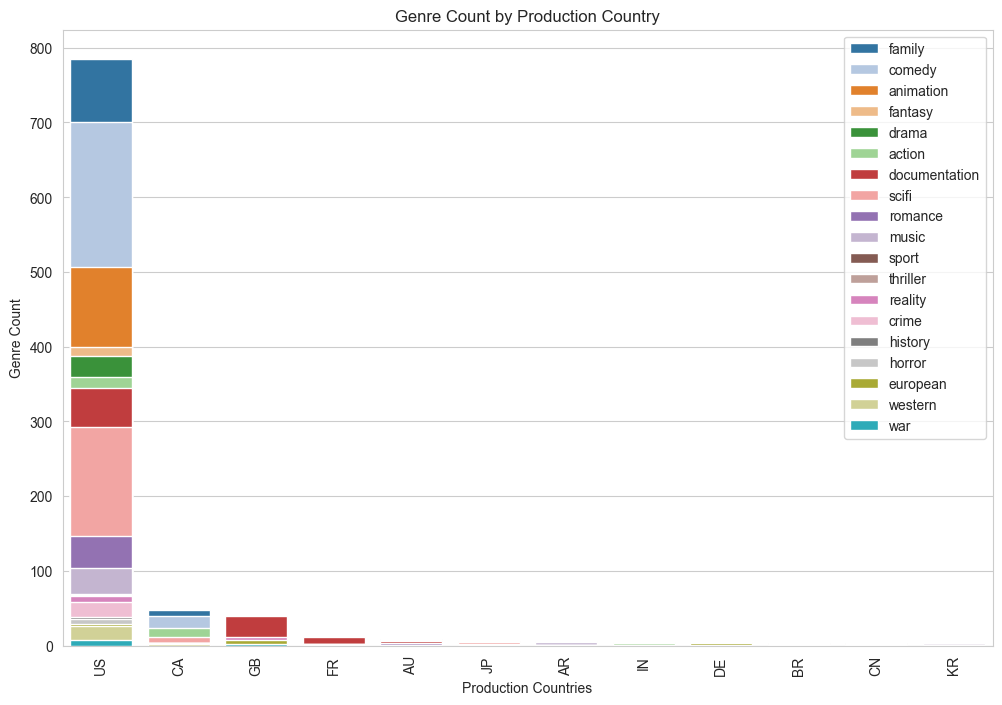

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

palette = sns.color_palette('husl', len(df_gen['genres'].unique()))

sns.set_style("whitegrid")
plt.figure(figsize=(12,8))
sns.barplot(x='production_countries', y='counts', hue='genres', 
            data= df_gen, dodge=False, palette='tab20')
plt.title('Genre Count by Production Country')
plt.xlabel('Production Countries')
plt.ylabel('Genre Count')
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.show()

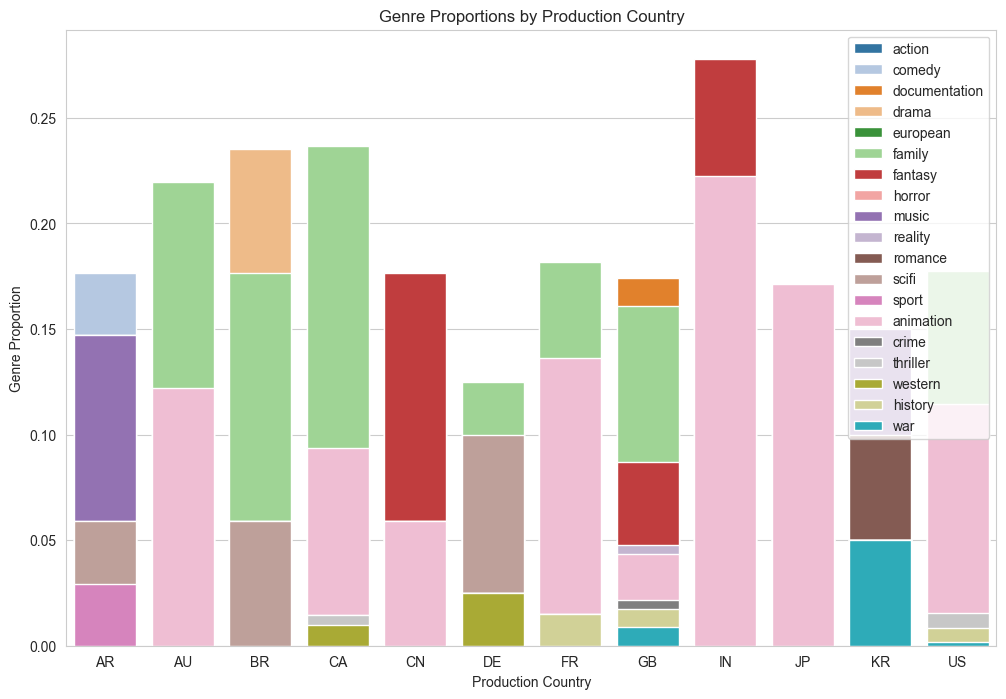

In [72]:
#Percent Stacked Barplot 
genre_count = df2.groupby(['production_countries', 'genres']).size().reset_index(name='counts')

# calculate the total counts for each production country
total_counts = genre_count.groupby('production_countries')['counts'].sum().reset_index(name='total_counts')

# merge the total counts with the genre count dataframe
genre_count = genre_count.merge(total_counts, on='production_countries')

# calculate the percentage of each genre count for each production country
genre_count['percent'] = genre_count['counts'] / genre_count['total_counts']

# plot the percentage stacked bar chart using seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(12,8))
sns.barplot(x='production_countries', y='percent', hue='genres', data=genre_count, dodge=False, palette='tab20', errorbar=None)
plt.title('Genre Proportions by Production Country')
plt.xlabel('Production Country')
plt.ylabel('Genre Proportion')
plt.legend(loc='upper right')
plt.show()

In [73]:
df2.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score', 'director', 'age_rating'],
      dtype='object')

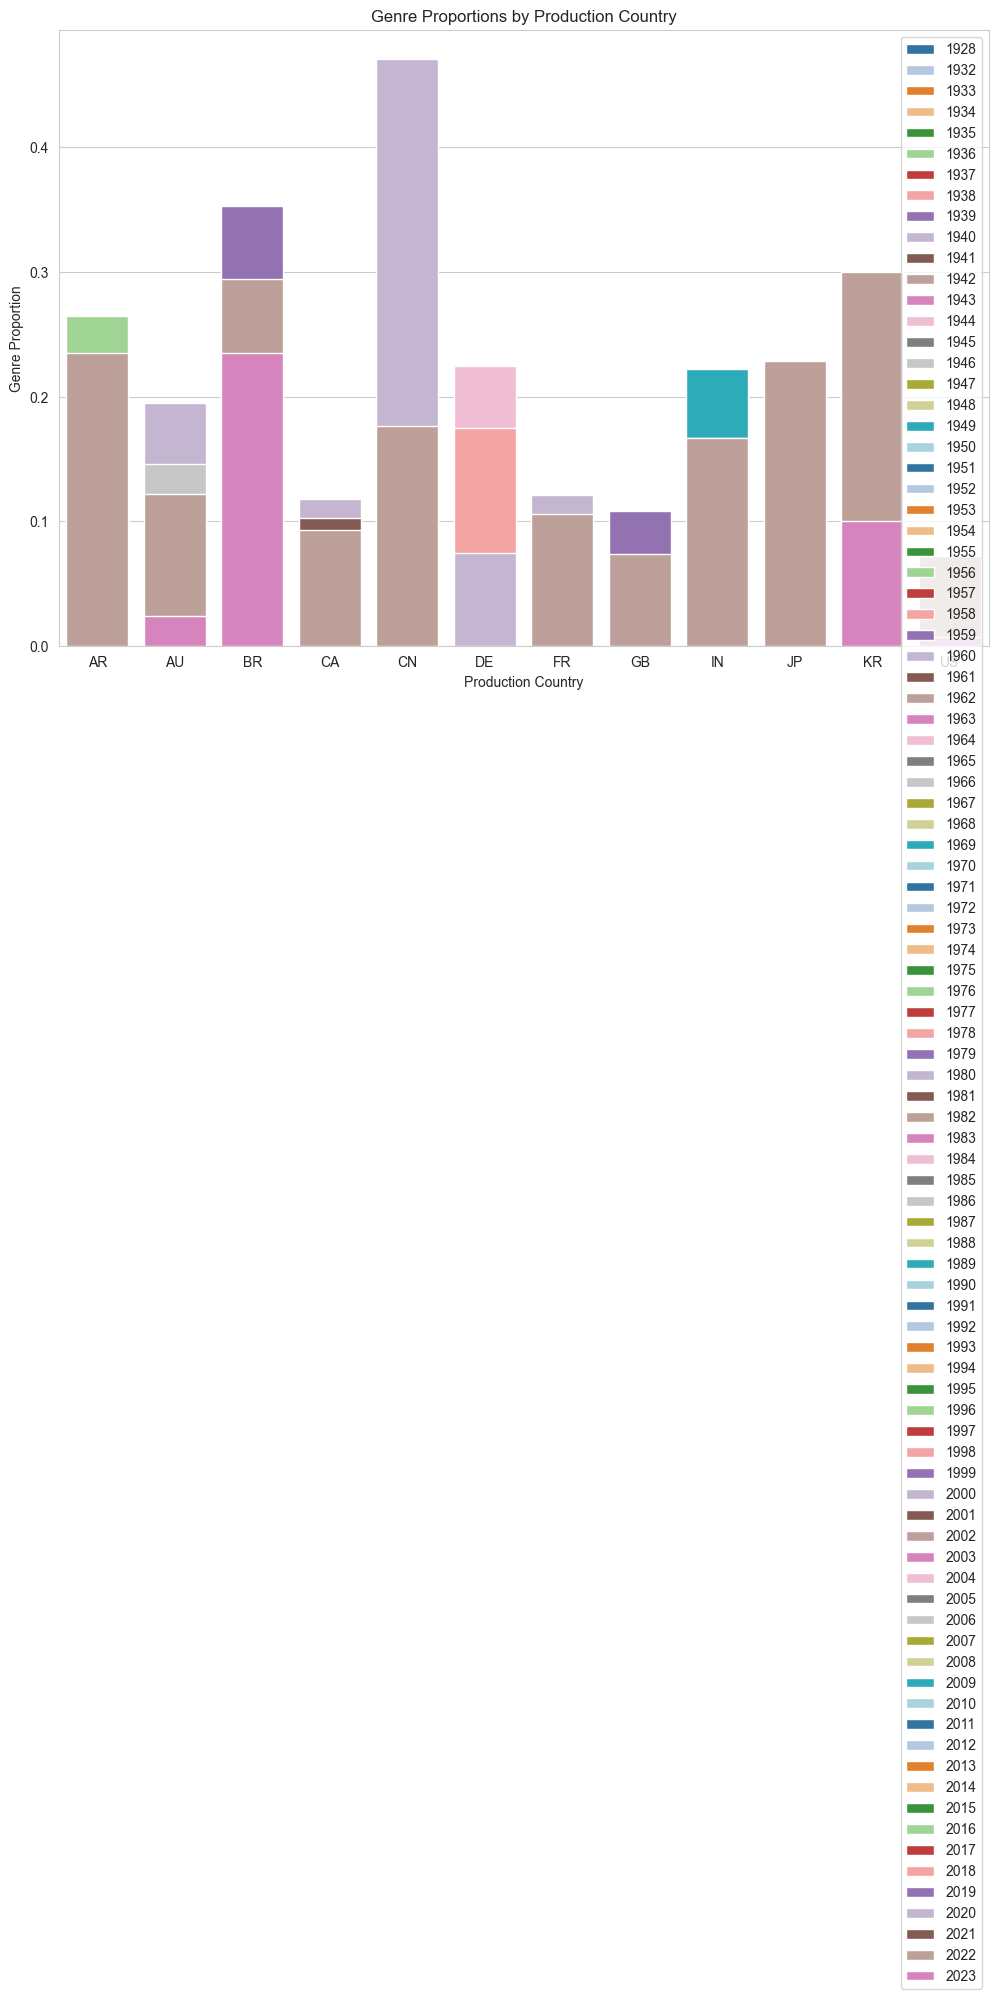

In [77]:
#Percent Stacked Barplot 
genre_count = df2.groupby(['production_countries', 'release_year']).size().reset_index(name='counts')

# calculate the total counts for each production country
total_counts = genre_count.groupby('production_countries')['counts'].sum().reset_index(name='total_counts')

# merge the total counts with the genre count dataframe
genre_count = genre_count.merge(total_counts, on='production_countries')

# calculate the percentage of each genre count for each production country
genre_count['percent'] = genre_count['counts'] / genre_count['total_counts']

# plot the percentage stacked bar chart using seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(12,8))
sns.barplot(x='production_countries', y='percent', hue='release_year', data=genre_count, dodge=False, palette='tab20', errorbar=None)
plt.title('Genre Proportions by Production Country')
plt.xlabel('Production Country')
plt.ylabel('Genre Proportion')
plt.legend(loc='upper right')
plt.show()

In [55]:
us_gen = df_gen[df_gen['production_countries'] == 'US']

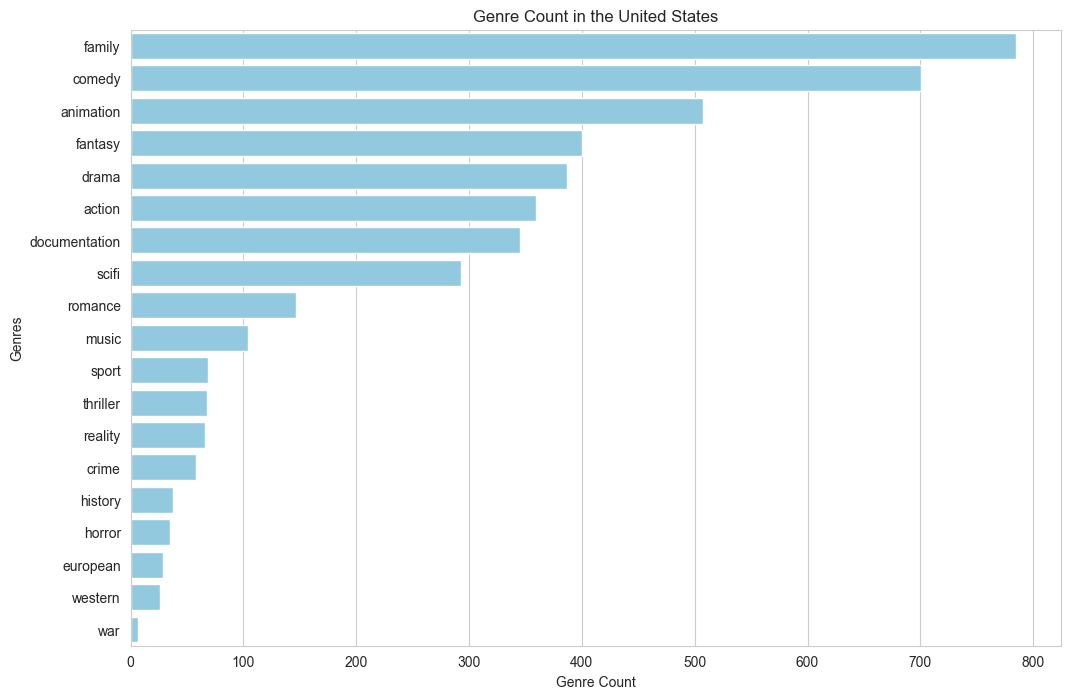

In [56]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,8))
sns.barplot(x='counts', y='genres', data=us_gen, color='skyblue')
plt.title('Genre Count in the United States')
plt.xlabel('Genre Count')
plt.ylabel('Genres')
plt.show()